In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercise 1

Load the tips dataset from either pydataset or seaborn.

In [7]:
# import data from pydataset
from pydataset import data

df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Exercise 2

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [8]:
# drop rows to create df of only the target variable and independent variable listed in the exercise description
df = df.drop(columns=['sex','smoker','day','time','size'])
df.head()

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61


In [9]:
# create another column with the baseline prediction
df['baseline'] = df.tip.mean()
df.head(2)

,total_bill,tip,baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279


In [22]:
# fit the model
model = LinearRegression().fit(df[['total_bill']], df['tip'])
# add column with predicted values
df['yhat'] = model.predict(df[['total_bill']])
df.head()

,total_bill,tip,baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


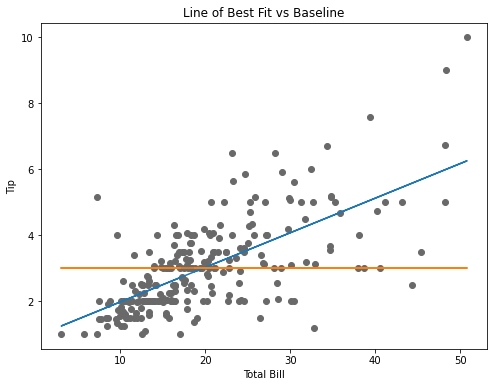

In [27]:
# plot the line of best fit and baseline
plt.figure(figsize=(8, 6))

# Plot regression line
plt.plot(df.total_bill, df.yhat)

# Plot the data points
plt.scatter(df.total_bill, df.tip, color='dimgray')

# add title
plt.title('Line of Best Fit vs Baseline')

# add axes labels
plt.ylabel('Tip')
plt.xlabel('Total Bill')
    
# add baseline
plt.plot(df.total_bill, df.baseline)

plt.show()

## Exercise 3

Plot the residuals for the linear regression model that you made.

In [28]:
# calculate residuals for both baseline and linear regression model
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline
df.head(3)

,total_bill,tip,baseline,yhat,residual,baseline_residual
1,16.99,1.01,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,2.998279,3.126835,0.373165,0.501721


In [32]:
df.residual.sum(), df.baseline_residual.sum()

(8.171241461241152e-14, -2.4868995751603507e-14)

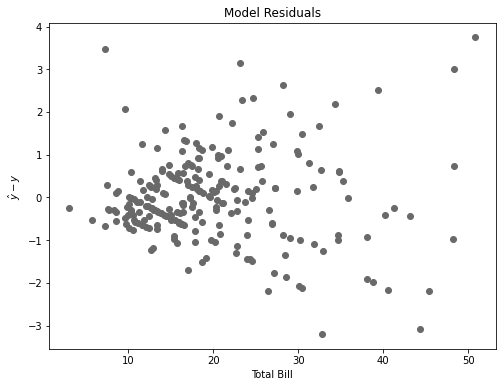

In [30]:
# plot residuals for linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(df.total_bill, df.residual, color='dimgray')

# set titles
plt.title('Model Residuals', fontsize=12, color='black')
# add axes labels
plt.ylabel(r'$\hat{y}-y$')
plt.xlabel('Total Bill')

plt.show()

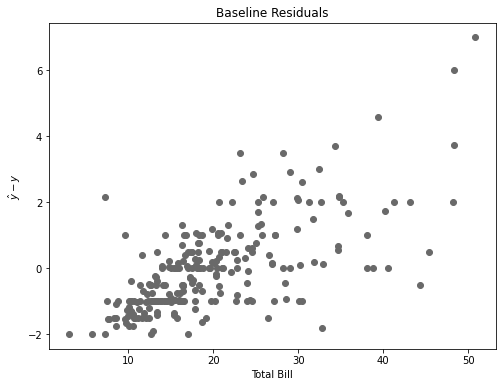

In [31]:
# plot residuals for baseline
plt.figure(figsize=(8, 6))
plt.scatter(df.total_bill, df.baseline_residual, color='dimgray')

# set titles
plt.title('Baseline Residuals', fontsize=12, color='black')
# add axes labels
plt.ylabel(r'$\hat{y}-y$')
plt.xlabel('Total Bill')

plt.show()

## Exercise 4

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### Sum of Squared Errors

In [36]:
# square the residuals then sum

df['residual_sq'] = df.residual**2
df['baseline_residual_sq'] = df.baseline_residual**2

SSE = df.residual_sq.sum()
baseline_SSE = df.baseline_residual_sq.sum()

print(f'SSE is {SSE} \nBaseline SSE is {baseline_SSE}')

SSE is 252.788743850776 
Baseline SSE is 465.2124770491804


### Explained Sum of Squares

In [ ]:
ESS = (yhat - tip)**2.sum

### Total Sum of Squares

## Exercise 5

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

## Exercise 6

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

## Exercise 7

What is the amount of variance explained in your model?

## Exercise 8

Is your model better than the baseline model?

## Exercise 9

Create a file named evaluate.py that contains the following functions:
 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

## Exercise 10

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.